In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

%matplotlib inline

In [11]:
sns.set_theme(style="whitegrid")

In [51]:
df = pd.read_csv("Avocado/avocado.csv")

### Purpose

Exploratory Data Analysis on the dataset and training a model to predict avocado prices.

### Dataset Info

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:

_The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table._

Source: __[Kaggle.com](https://www.kaggle.com/neuromusic/avocado-prices)__ 

### Some relevant columns in the dataset:

__Date__ - The date of the observation   
__AveragePrice__ - the average price of a single avocado  
__Total Volume__ - Total number of avocados sold   
__4046__ - Total number of avocados with PLU 4046 sold      
__4225__ - Total number of avocados with PLU 4225 sold     
__4770__ - Total number of avocados with PLU 4770 sold   
__type__ - conventional or organic      
__year__ - the year     
__Region__ - the city or region of the observation   
   
 *** 

In [52]:
#df.drop(columns=["Unnamed: 0", 'year'], axis=1, inplace=True)
df.head()


Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  region  
0     8696.87     8603.62       93.25          0.0  conventional  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  Albany

In [53]:
# changing Date column from string to datetime type
df['Date'] = pd.to_datetime(df['Date'])

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 1.7+ MB


In [55]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'region'],
      dtype='object')

# EDA 

***
 

I chose to use Profile Report as it is very cool library and very helpful. Feel free to explore the data presentation there.

In [56]:
profile = ProfileReport(df, title='Avocado Profile Report')
profile.to_notebook_iframe()

While having a look at the count for avocado types, we can see that the numbers are quite equal. 

<AxesSubplot:xlabel='type', ylabel='count'>

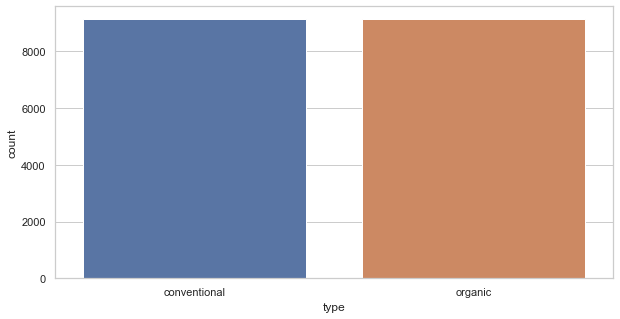

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(x='type', data=df)

Let's see a distribution with the price for the 2 categories that we have, "conventional" and "organic". The graph shows us that the 'organic' avocados tend to have higher price which is expected. 

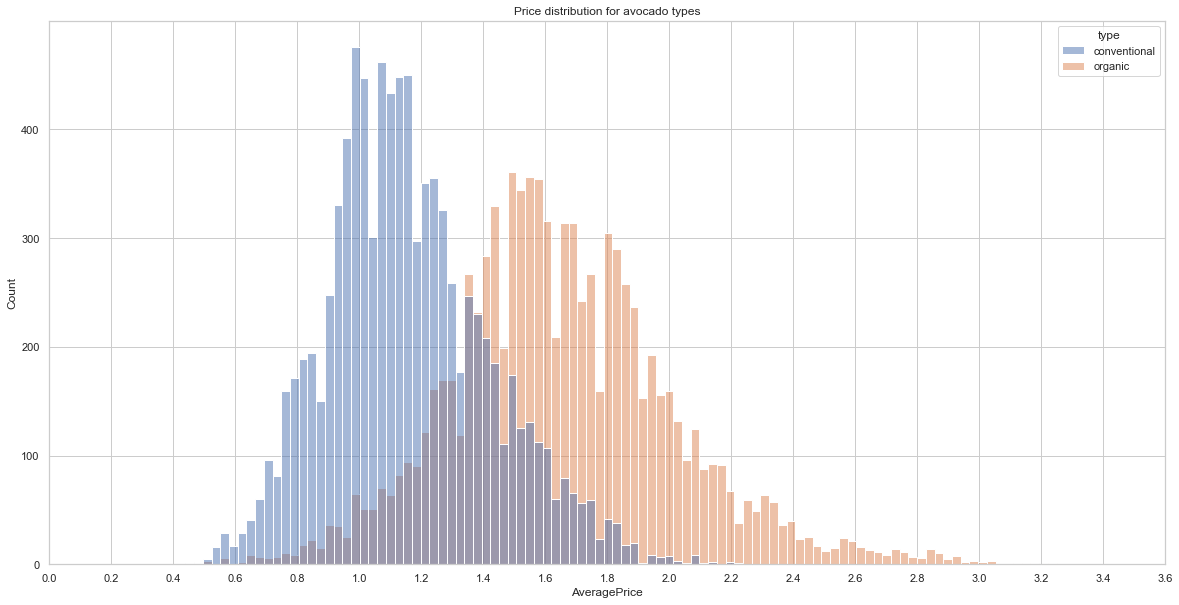

In [39]:
plt.figure(figsize=(20,10))
sns.histplot(x='AveragePrice', data=df, hue='type', bins=100)
plt.title("Price distribution for avocado types")
plt.xticks(np.arange(0, 3.8 , 0.2));

Let's have a look at the Mean Avarage Volume over time. We see that between around Februay and May the volumes are up. I am no avocado expert so I had a look on Google and I found some mentions that in USA Hass avocados become plentiful in spring to early summer.    

We see also that the volume is increasing with time.

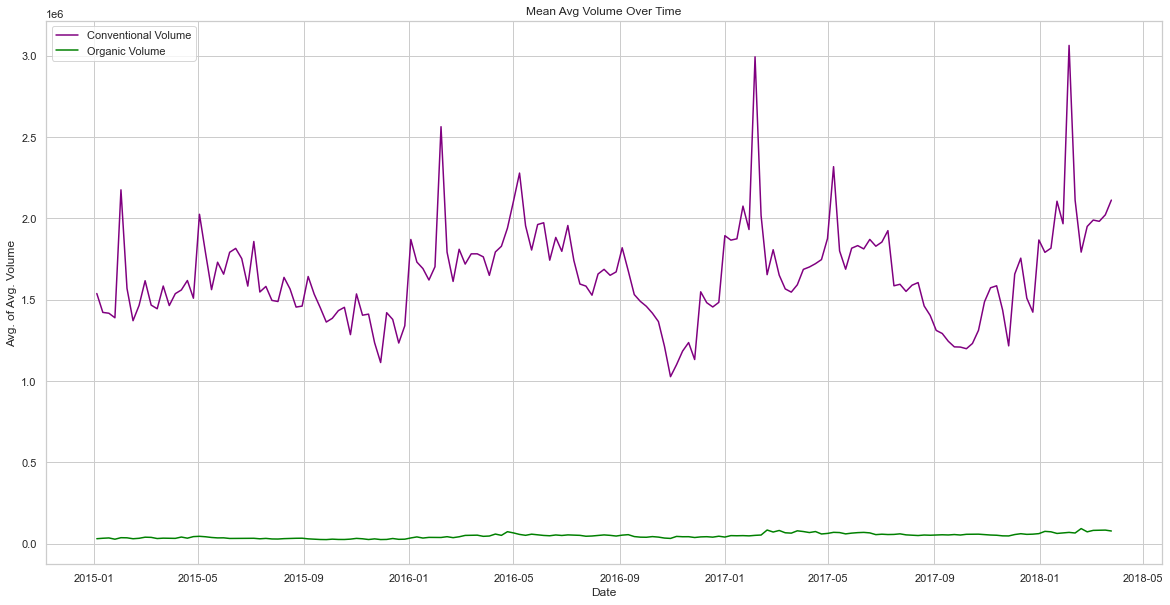

In [62]:
con = df[df['type'] == 'conventional'].groupby('Date').mean().reset_index()
org = df[df['type'] == 'organic'].groupby('Date').mean().reset_index()

fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(con['Date'], con['Total Volume'], c='purple', label='Conventional Volume')
ax1.plot(org['Date'], org['Total Volume'], c='green', label='Organic Volume')

ax1.set_xlabel("Date")
ax1.set_ylabel('Avg. of Avg. Volume')

h1, l1 = ax1.get_legend_handles_labels()
ax1.legend(h1, l1, loc=2)
plt.title('Mean Avg Volume Over Time')
plt.show()

Same as we did for the graph above, we can have a look at the Mean Average price Over time. We see that when the volumes are up, the price tend to stay the same for both categories, and when the volumes are down, automatically the price go up. Looks like basic Supply and Demand principles. 

Regarding the price, we see here also that with time it tends to increase. 

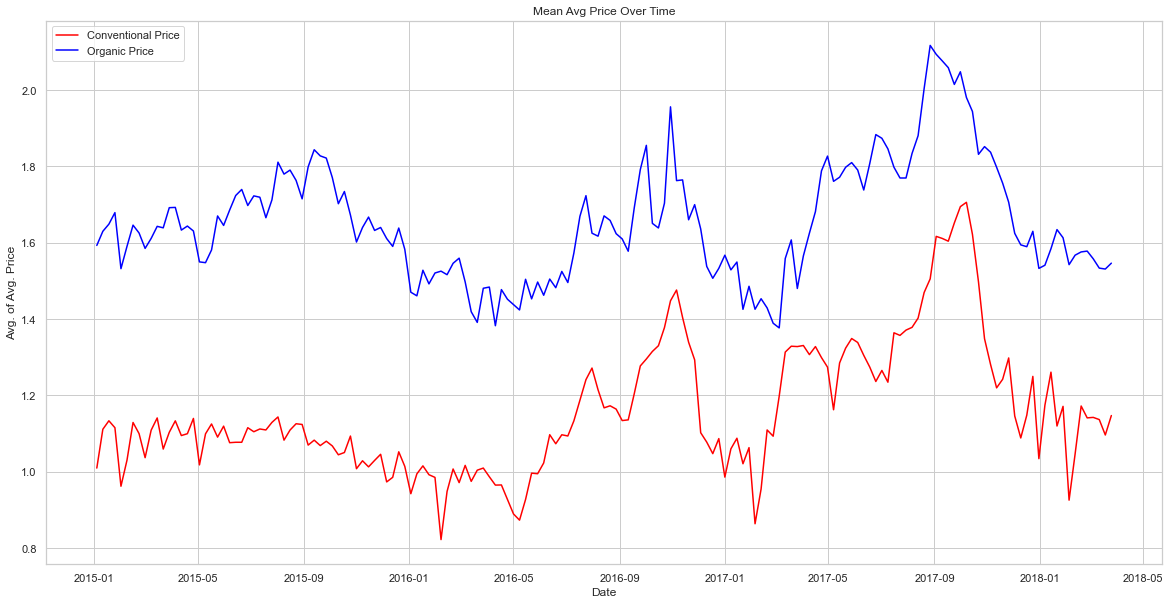

In [61]:
con = df[df['type'] == 'conventional'].groupby('Date').mean().reset_index()
org = df[df['type'] == 'organic'].groupby('Date').mean().reset_index()

fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(con['Date'], con['AveragePrice'], c='red', label='Conventional Price')
ax1.plot(org['Date'], org['AveragePrice'], c='blue', label='Organic Price')

ax1.set_xlabel("Date")
ax1.set_ylabel('Avg. of Avg. Price')

h1, l1 = ax1.get_legend_handles_labels()
ax1.legend(h1, l1, loc=2)
plt.title('Mean Avg Price Over Time')
plt.show()

As we saw the distribution over time for volume and price, we can consider that the Months are giving us good information so we can substitute the Date column with month only.

In [65]:
df1 = df.copy()
df1['Month'] = df1['Date'].dt.month
df1 = df1.drop('Date', axis=1)

In [66]:
df1.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  region  Month  
0     8603.62       93.25          0.0  conventional  Albany     12  
1     9408.07       97.49          0.0  conventional  Albany     12  
2     8042.21      103.14          0.0  conventional  Albany     12  
3     5677.40      133.76          0.0  conventional  Albany     12  
4     5986.26      197.69          0.0  conventional  Albany     11

***
Let's have a look at the Correlation Matrix. We do not really see much, but only a quite small positive correlation between Price and Month. 

Text(0.5, 1.0, 'Correlation Matrix')

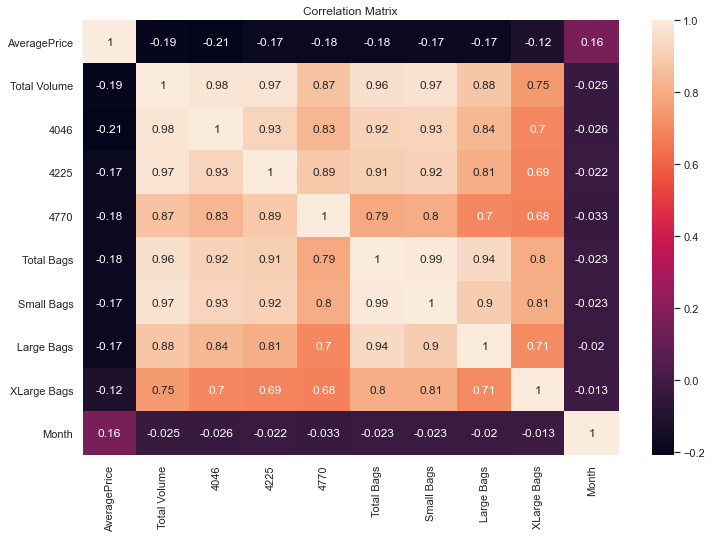

In [69]:
corr = df1.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")

## Data Preparation
***
Not it is time to prepare the data.

In [72]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df1['type'] = le.fit_transform(df['type'])

In [73]:
df1.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'region', 'Month'],
      dtype='object')

In [78]:
X = df1[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'Month', 'region']]
y = df1['AveragePrice']     

In [75]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We will need to create pipelines and also to use one-hot encoding for categorial features.

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [93]:
nr_attrib = ['Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags','Month']
cat_attrib = ['type', 'region']

nr_pipeline = Pipeline([('std_scaler', StandardScaler()),])
pipeline = ColumnTransformer([('num', nr_pipeline, nr_attrib), ('cat', OneHotEncoder(), cat_attrib)])

train_ready = pipeline.fit_transform(X_train, y_train)
test_ready = pipeline.transform(X_test)

In [84]:
train_ready.toarray()[0]

array([ 0.13291893,  0.20057788, -0.00397896, -0.15496405,  0.2338701 ,
        0.23457335,  0.24135791, -0.17232567, -1.4697585 ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

## Train and Test the model

For this I chose a simple Linear Regression.

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
lm = LinearRegression()

In [88]:
lm.fit(train_ready, y_train)

LinearRegression()

In [89]:
print('Coefficients: /n', lm.coef_)

Coefficients: /n [ 1.56578363e+02 -5.70156126e+01 -5.51851927e+01 -4.98772995e+00
 -1.78528219e+01 -1.99734391e+01 -6.59097171e+00 -4.62891188e-01
  6.42120195e-02 -2.48086058e-01  2.48085418e-01  1.52969598e-01
 -6.57873928e-02  1.21955602e-01 -3.45239989e-02  1.03240730e-01
  1.12996694e-01 -1.81924086e-02  2.04467486e-01  1.65332551e-01
 -1.97094703e-01 -1.59722071e-01 -3.22734086e-01 -1.65502303e-01
 -1.34910808e-01  1.04187942e-01 -9.07034995e-02  1.03050322e-01
  3.94895784e-01 -3.48198701e-01 -9.38100717e-02  1.08162262e-01
 -2.20110092e-02 -2.05148961e-01 -1.21518207e-01  1.16800253e-02
 -7.87016779e-04 -1.81989032e-01 -1.04073373e-01  3.30101637e-01
  2.11929216e-01  7.18668274e-02  1.10464706e-01  2.35030948e-01
 -1.71986901e-01 -3.74444600e-02  2.22556508e-02 -1.00152499e-01
  1.49873627e-01 -1.25999474e-01 -1.55021160e-01  2.17415407e-01
  4.71281923e-03  3.84560791e-01  1.53743240e-02  3.83511199e-03
 -3.13024108e-01 -8.18353479e-03  2.55027574e-02  1.72004543e-02
  1.0951

In [94]:
predictions = lm.predict(test_ready)

Text(0, 0.5, 'Predicted Y')

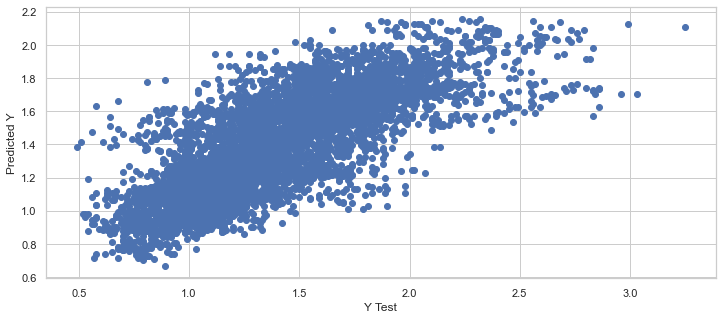

In [96]:
plt.figure(figsize=(12,5))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Having a look ath the plot, the model did a good job. This is my first attempt on training a model. I am sure that I can improve this and probably I will get back to this when I have more knowledge and experience, but at this time I will leave it where it is. 

Thanks for reading until here. 